<a href="https://colab.research.google.com/github/ArthurLazdin/Left-Right-Side-Titanic-Cabins/blob/main/LeftOrRight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Data/train.csv')


In [ ]:
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titanic_cabins = titanic_train.loc[:,['Survived','Cabin']]
titanic_cabins
len(titanic_cabins)

891

In [18]:
titanic_cabins_info = titanic_cabins.dropna(how='any')

#x = len(titanic_cabins_info)
#l = ['A']*x
#titanic_cabins_info = titanic_cabins_info.copy()
#titanic_cabins_info['New'] = l
titanic_cabins_info

,Survived,Cabin
1,1,C85
3,1,C123
6,0,E46
10,1,G6
11,1,C103
...,...,...
871,1,D35
872,0,B51 B53 B55
879,1,C50
887,1,B42


In [20]:
left_or_right = []
error_cabin_number = 0
to_much_char = 0

for cabin in titanic_cabins_info['Cabin']:
  if len(cabin) > 4:
    print(cabin)
    to_much_char += 1

  if cabin[-1].isdigit():
    if int(cabin[-1]) % 2 == 1:
      left_or_right.append('R')
    else:
      left_or_right.append('L')
  else:
    error_cabin_number += 1
    print(cabin)
    left_or_right.append('L')

print(len(left_or_right))
print(to_much_char)
print(error_cabin_number)

#left_or_right

C23 C25 C27
F G73
C23 C25 C27
D10 D12
B58 B60
F E69
D
C22 C26
B58 B60
C22 C26
B57 B59 B63 B66
D
T
C23 C25 C27
B96 B98
B96 B98
C23 C25 C27
D
C22 C26
B51 B53 B55
F G63
C62 C64
F G73
B57 B59 B63 B66
B96 B98
B82 B84
B96 B98
B51 B53 B55
204
24
4


In [22]:
titanic_cabins_info = titanic_cabins_info.copy()
titanic_cabins_info['Side'] = left_or_right
titanic_cabins_info

,Survived,Cabin,Side
1,1,C85,R
3,1,C123,R
6,0,E46,L
10,1,G6,L
11,1,C103,R
...,...,...,...
871,1,D35,R
872,0,B51 B53 B55,R
879,1,C50,L
887,1,B42,L


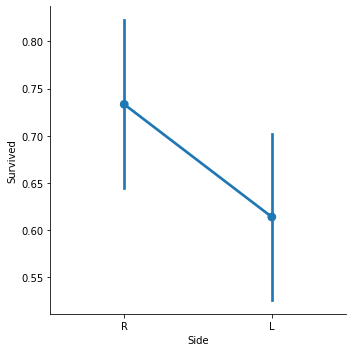

In [23]:
sns.catplot(x='Side', y='Survived', data=titanic_cabins_info, kind='point' , aspect=1)